# **Import Libraries**

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from sklearn.ensemble import RandomForestClassifier


# **Load Dataset**

In [25]:
df = pd.read_csv('/content/salesdataset.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,01-01-20 00:00,1.71,37039,Australia,0.470000,Bank Transfer,10.79,Apparel,In-store,0,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,01-01-20 01:00,41.25,19144,Spain,0.190000,paypall,9.51,Electronics,Online,0,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,01-01-20 02:00,29.11,50472,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,1,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,01-01-20 03:00,76.68,96586,Netherlands,0.140000,paypall,11.08,Accessories,Online,0,Royal Mail,Rome,Low
4,359178,SKU_1386,USB Cable,-30,01-01-20 04:00,-68.11,1,United Kingdom,1.501433,Bank Transfer,1.00,Electronics,In-store,0,FedEx,1,Medium


# **Data Analysis**

In [26]:
# Display first five entries of data

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,01-01-20 00:00,1.71,37039,Australia,0.470000,Bank Transfer,10.79,Apparel,In-store,0,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,01-01-20 01:00,41.25,19144,Spain,0.190000,paypall,9.51,Electronics,Online,0,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,01-01-20 02:00,29.11,50472,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,1,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,01-01-20 03:00,76.68,96586,Netherlands,0.140000,paypall,11.08,Accessories,Online,0,Royal Mail,Rome,Low
4,359178,SKU_1386,USB Cable,-30,01-01-20 04:00,-68.11,1,United Kingdom,1.501433,Bank Transfer,1.00,Electronics,In-store,0,FedEx,1,Medium


In [27]:
# Display last five entries of data

df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
49777,354083,SKU_1562,Blue Pen,25,05-09-25 01:00,70.92,51445,Spain,0.20,Credit Card,8.96,Electronics,Online,1,UPS,Berlin,Medium
49778,296698,SKU_1930,USB Cable,7,05-09-25 02:00,51.74,28879,United States,0.23,Bank Transfer,23.55,Electronics,Online,0,FedEx,Amsterdam,Low
49779,177622,SKU_1766,Office Chair,43,05-09-25 03:00,85.25,21825,Portugal,0.20,Bank Transfer,16.26,Furniture,In-store,0,FedEx,London,High
49780,701213,SKU_1602,Notebook,48,05-09-25 04:00,39.64,43199,United Kingdom,0.31,paypall,28.56,Apparel,Online,0,Royal Mail,London,Medium
49781,772215,SKU_1832,White Mug,30,05-09-25 05:00,38.27,53328,France,0.10,Credit Card,9.13,Stationery,Online,0,UPS,Rome,Low


In [28]:
# Display random numbers of data

df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
42951,980269,SKU_1382,Wall Clock,19,24-11-24 15:00,30.97,79511,Portugal,0.39,Credit Card,6.23,Accessories,In-store,0,FedEx,London,Low
10376,703910,SKU_1964,Wall Clock,34,08-03-21 08:00,57.28,44504,Australia,0.32,Credit Card,14.24,Apparel,In-store,0,Royal Mail,Rome,Low
47775,203250,SKU_1825,USB Cable,4,13-06-25 15:00,15.46,60705,Sweden,0.18,paypall,24.92,Stationery,In-store,0,UPS,Rome,Low
33008,685923,SKU_1651,Wireless Mouse,18,07-10-23 08:00,45.12,95068,Netherlands,0.17,paypall,25.31,Electronics,Online,0,DHL,Paris,Medium
25962,541289,SKU_1358,Blue Pen,23,17-12-22 18:00,98.58,98615,Spain,0.43,paypall,19.23,Stationery,In-store,0,FedEx,Paris,Medium
14353,362399,SKU_1561,Notebook,23,21-08-21 01:00,58.03,68518,Australia,0.31,Credit Card,12.80,Apparel,Online,0,FedEx,Paris,Low
9545,361420,SKU_1860,Backpack,34,01-02-21 17:00,21.85,21644,Netherlands,0.43,paypall,27.43,Electronics,In-store,0,FedEx,London,Medium
9863,950100,SKU_1898,Wireless Mouse,29,14-02-21 23:00,89.70,89831,Australia,0.38,paypall,8.88,Electronics,Online,0,Royal Mail,London,High
19724,600508,SKU_1694,Office Chair,22,01-04-22 20:00,54.76,68899,United States,0.39,Credit Card,17.96,Apparel,In-store,0,UPS,Paris,Low
40636,188003,SKU_1827,Desk Lamp,40,20-08-24 04:00,34.40,69018,Australia,0.05,Bank Transfer,11.06,Apparel,Online,0,DHL,Amsterdam,Low


In [29]:
# Show the information of data to find any null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49782 entries, 0 to 49781
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          49782 non-null  int64  
 1   StockCode          49782 non-null  object 
 2   Description        49782 non-null  object 
 3   Quantity           49782 non-null  int64  
 4   InvoiceDate        49782 non-null  object 
 5   UnitPrice          49782 non-null  float64
 6   CustomerID         49782 non-null  int64  
 7   Country            49782 non-null  object 
 8   Discount           49782 non-null  float64
 9   PaymentMethod      49782 non-null  object 
 10  ShippingCost       49782 non-null  float64
 11  Category           49782 non-null  object 
 12  SalesChannel       49782 non-null  object 
 13  ReturnStatus       49782 non-null  int64  
 14  ShipmentProvider   49782 non-null  object 
 15  WarehouseLocation  49782 non-null  object 
 16  OrderPriority      497

# **Data Visualization**

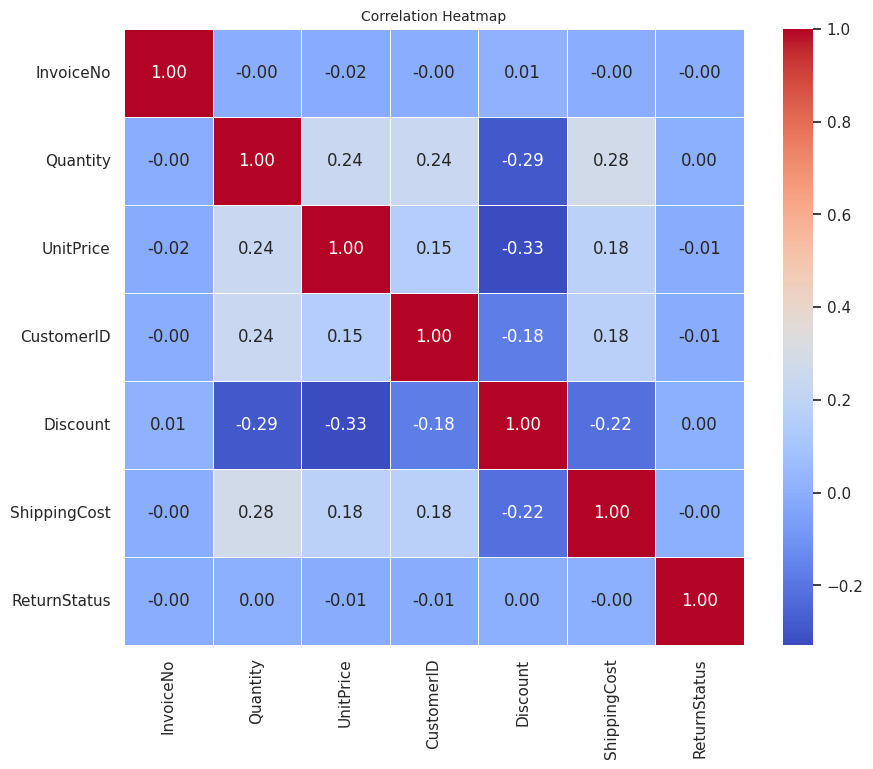

In [30]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Correlation Heatmap
def plot_correlation_heatmap(data):
    data=data.select_dtypes(include=['number'])
    plt.figure(figsize=(10, 8))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Correlation Heatmap", fontsize=10)
    plt.show()

plot_correlation_heatmap(df)


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615:

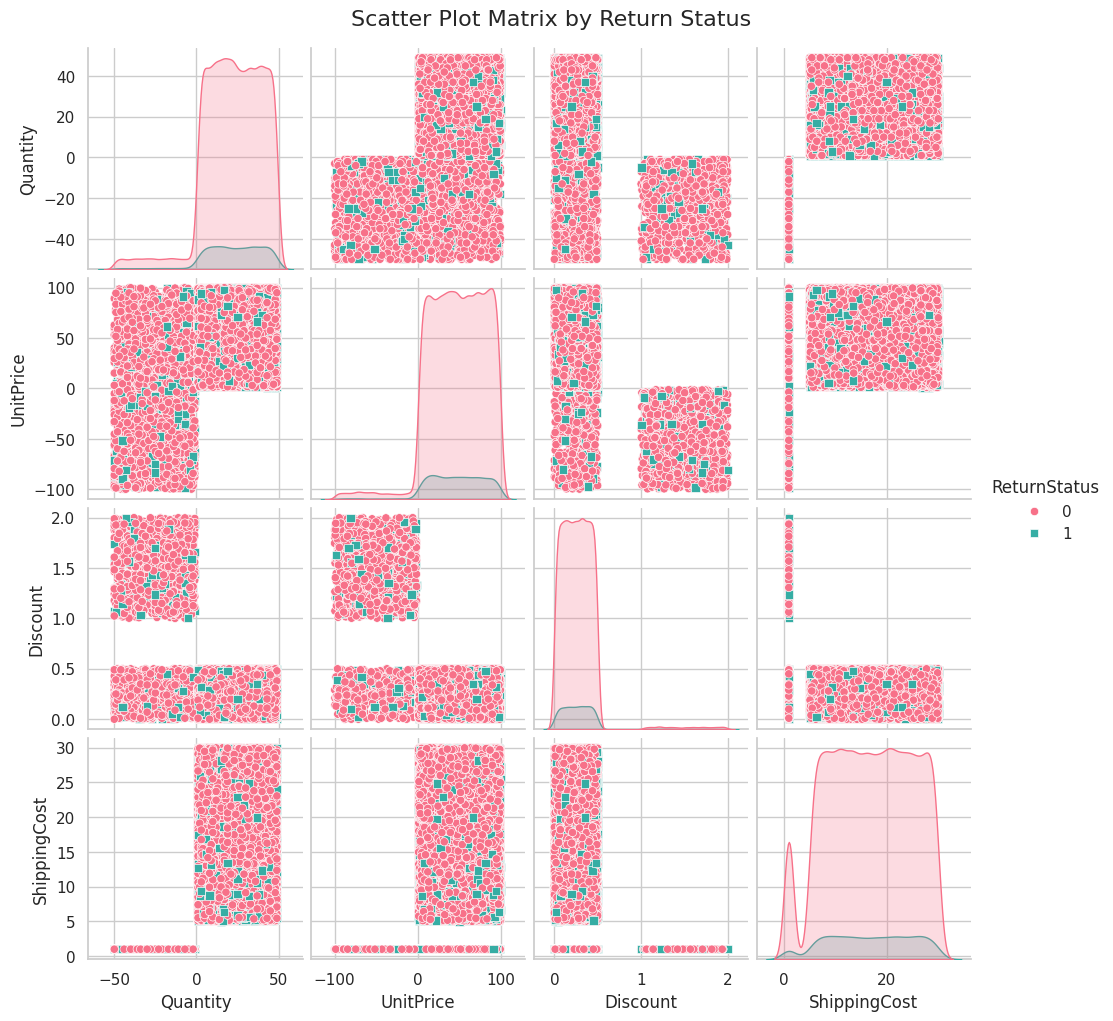

In [31]:
def plot_scatter_matrix(data, features):
    """
    Generates a scatter plot matrix using available columns.
    """
    # Select relevant columns for plotting
    plot_data = data[features + ['ReturnStatus']]

    # Create the pairplot with 'ReturnStatus' as hue
    sns.pairplot(
        plot_data,
        hue='ReturnStatus',
        palette='husl',
        diag_kind="kde",
        markers=['o', 's', 'D'],  # Use different markers for return statuses
    )

    # Add a title to the plot
    plt.suptitle("Scatter Plot Matrix by Return Status", y=1.02, fontsize=16)

    # Display the plot
    plt.show()

# Select numerical features
features = ['Quantity', 'UnitPrice', 'Discount', 'ShippingCost']

# Call the function to generate the scatter plot matrix
plot_scatter_matrix(df, features)

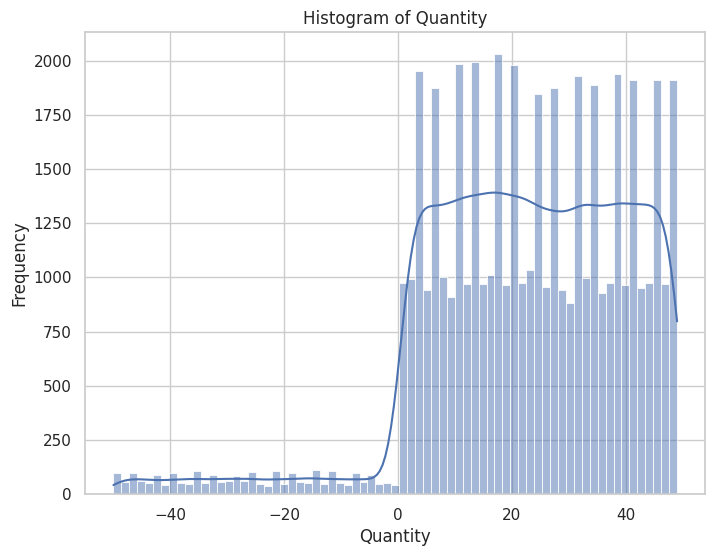

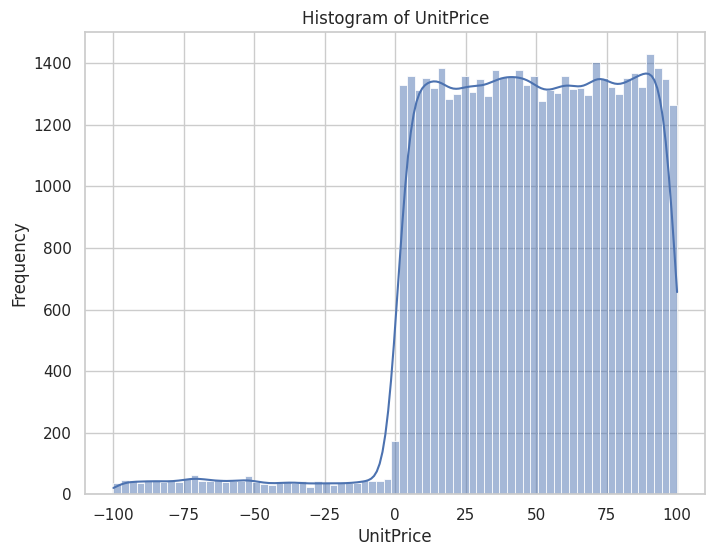

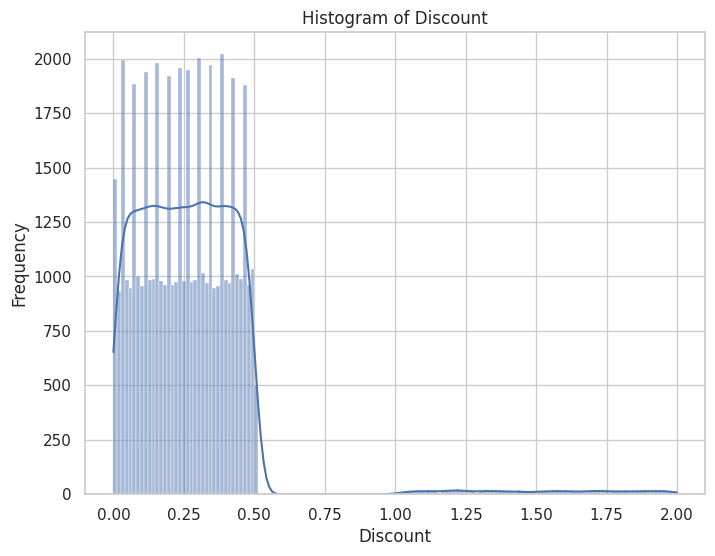

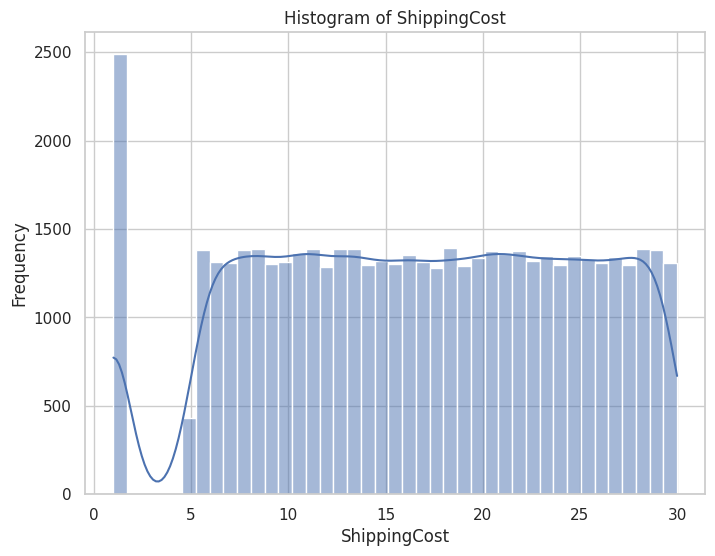

In [32]:

def plot_histograms(data, features):
    """
    Plots histograms for specified numerical features.
    """
    for feature in features:
        plt.figure(figsize=(8, 6))
        sns.histplot(data[feature], kde=True)
        plt.title(f"Histogram of {feature}")
        plt.xlabel(feature)
        plt.ylabel("Frequency")
        plt.show()


# Select numerical features for histograms
features_for_histograms = ['Quantity', 'UnitPrice', 'Discount', 'ShippingCost']

# Call the function to generate histograms
plot_histograms(df, features_for_histograms)

Mean Squared Error: 2393.8058563674567
R-squared: -0.11872007547712227


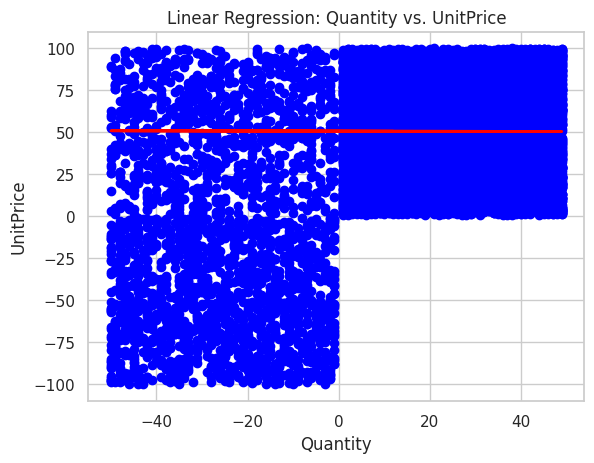

In [33]:

# Assuming 'UnitPrice' is the target variable and 'Quantity' is the predictor
X = df[['Quantity']]
y = df['UnitPrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the regression line
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.title('Linear Regression: Quantity vs. UnitPrice')
plt.show()

In [34]:
X = df[['Quantity', 'UnitPrice', 'Discount', 'ShippingCost']]
y = df['ReturnStatus']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9020789394395903


In [35]:
# Assuming 'ReturnStatus' is the target variable and 'Quantity', 'UnitPrice', 'Discount', 'ShippingCost' are the features
X = df[['Quantity', 'UnitPrice', 'Discount', 'ShippingCost']]
y = df['ReturnStatus']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree model
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate a confusion matrix
print("\nConfusion Matrix:")
print(pd.DataFrame(confusion_matrix(y_test, y_pred)))

Accuracy: 0.7892939640453952

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      8982
           1       0.09      0.13      0.11       975

    accuracy                           0.79      9957
   macro avg       0.50      0.50      0.50      9957
weighted avg       0.82      0.79      0.81      9957


Confusion Matrix:
      0     1
0  7730  1252
1   846   129


In [36]:
X = df[['Quantity', 'UnitPrice', 'Discount', 'ShippingCost']]
y = df['ReturnStatus']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. ANN Model
model_ann = Sequential()
model_ann.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model_ann.add(Dense(64, activation='relu'))
model_ann.add(Dense(1, activation='sigmoid'))

model_ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_ann.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

y_pred_ann = (model_ann.predict(X_test) > 0.5).astype("int32")
accuracy_ann = accuracy_score(y_test, y_pred_ann)
print(f"ANN Accuracy: {accuracy_ann}")






# 3. Random Forest Model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1245/1245 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9034 - loss: 0.3598
Epoch 2/10
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9004 - loss: 0.3370
Epoch 3/10
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9038 - loss: 0.3253
Epoch 4/10
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9044 - loss: 0.3227
Epoch 5/10
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9022 - loss: 0.3249
Epoch 6/10
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8998 - loss: 0.3293
Epoch 7/10
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9012 - loss: 0.3262
Epoch 8/10
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9001 - loss: 0.3276
Epoch 9/10
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8995 - loss: 0.3284
Epoch 10/10
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9017 - loss: 0.3225
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
ANN Accuracy: 0.9020789394395903
Random Forest Accuracy: 0.901576780154665


# **Different Classification Algorithms**
## *Random Forest Algorithm*

In [37]:

X = df[['Quantity', 'UnitPrice', 'Discount', 'ShippingCost']]
y = df['ReturnStatus']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = model_rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Generate a confusion matrix
print("\nConfusion Matrix:")
print(pd.DataFrame(confusion_matrix(y_test, y_pred_rf)))

Random Forest Accuracy: 0.901576780154665

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      8982
           1       0.14      0.00      0.00       975

    accuracy                           0.90      9957
   macro avg       0.52      0.50      0.48      9957
weighted avg       0.83      0.90      0.86      9957


Confusion Matrix:
      0  1
0  8976  6
1   974  1


## ***Decision Tree Algorithm***

In [38]:

X = df[['Quantity', 'UnitPrice', 'Discount', 'ShippingCost']]
y = df['ReturnStatus']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree model
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy}")

# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate a confusion matrix
print("\nConfusion Matrix:")
print(pd.DataFrame(confusion_matrix(y_test, y_pred)))



Decision Tree Accuracy: 0.7864818720498142

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      8982
           1       0.09      0.13      0.11       975

    accuracy                           0.79      9957
   macro avg       0.50      0.50      0.49      9957
weighted avg       0.82      0.79      0.80      9957


Confusion Matrix:
      0     1
0  7701  1281
1   845   130


## *Logistic Regression Algorithm*

In [39]:
X = df[['Quantity', 'UnitPrice', 'Discount', 'ShippingCost']]
y = df['ReturnStatus']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy}")

# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate a confusion matrix
print("\nConfusion Matrix:")
print(pd.DataFrame(confusion_matrix(y_test, y_pred)))

Logistic Regression Accuracy: 0.9020789394395903

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      8982
           1       0.00      0.00      0.00       975

    accuracy                           0.90      9957
   macro avg       0.45      0.50      0.47      9957
weighted avg       0.81      0.90      0.86      9957


Confusion Matrix:
      0  1
0  8982  0
1   975  0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## *Clustering*

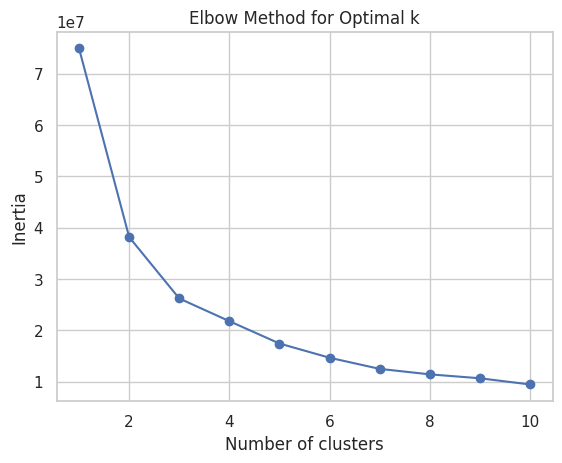

Cluster 0:
           InvoiceNo      Quantity     UnitPrice    CustomerID      Discount  \
count   23983.000000  23983.000000  23983.000000  23983.000000  23983.000000   
mean   547273.823375     23.780219     75.541067  51022.859150      0.250159   
std    260591.900232     15.917819     14.136840  28657.116749      0.144118   
min    100005.000000    -50.000000     50.540000      1.000000      0.000000   
25%    320322.500000     12.000000     63.240000  27603.000000      0.130000   
50%    546395.000000     24.000000     75.520000  51613.000000      0.250000   
75%    771125.000000     37.000000     87.875000  75278.500000      0.380000   
max    999997.000000     49.000000    100.000000  99998.000000      0.500000   

       ShippingCost  ReturnStatus  cluster  
count  23983.000000  23983.000000  23983.0  
mean      17.186459      0.096693      0.0  
std        7.536350      0.295546      0.0  
min        1.000000      0.000000      0.0  
25%       10.880000      0.000000      0.0 

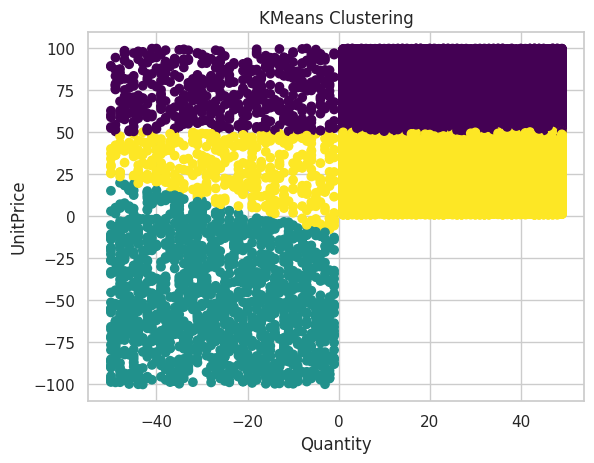

In [41]:
# Select features for clustering
X = df[['Quantity', 'UnitPrice', 'Discount', 'ShippingCost']]

# Determine the optimal number of clusters using the elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Based on the elbow method, choose the optimal number of clusters (e.g., k=3)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Add cluster labels to the DataFrame
df['cluster'] = kmeans.labels_

# Analyze the clusters
for i in range(k):
  print(f"Cluster {i}:")
  print(df[df['cluster'] == i].describe())

# Visualize the clusters (for 2D visualization, you can choose two features)
plt.scatter(df['Quantity'], df['UnitPrice'], c=df['cluster'], cmap='viridis')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.title('KMeans Clustering')
plt.show()